In [1]:
import numpy as np

In [2]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
LANDCOVER_VALUE_TO_TYPE = {
    0: 'water',
    1: 'evergreen needleleaf forest',
    2: 'evergreen broadleaf forest',
    3: 'deciduous needleleaf forest',
    4: 'deciduous broadleaf forest',
    5: 'mixed forest',
    6: 'closed shrublands',
    7: 'open shrublands',
    8: 'woody savannas',
    9: 'savannas',
    10: 'grasslands',
    11: 'permanent wetlands',
    12: 'croplands',
    13: 'urban and built-up',
    14: 'cropland/natural vegetation mosaic',
    15: 'snow and ice',
    16: 'barren or sparsely vegetated',
    244: 'unclassified',
    255: 'fill Value'
}

In [4]:
LANDCOVER = np.array([
    [2, 0, 0],
    [3, 0, 0],
    [4, 0, 0],
    [5, 0, 0],
    [4, 1, 0],
    [4, 5, 0],
    [5, 5, 0],
    [0, 0, 4],
    [0, 1, 4],
    [5, 1, 4],
    [3, 2, 4],
    [4, 2, 4],
    [5, 2, 4],
    [3, 3, 4],
    [2, 4, 6],
    [3, 5, 6],
    [3, 4, 7],
    [2, 5, 7],
    [0, 2, 8],
    [2, 3, 8],
    [0, 4, 8],
    [0, 3, 9],
    [1, 3, 9],
    [1, 4, 9],
    [0, 5, 9],
    [1, 5, 9],
    [1, 0, 10],
    [1, 2, 10],
    [4, 3, 10],
    [4, 4, 10],
    [5, 4, 10],
    [3, 1, 11],
    [1, 1, 12],
    [2, 2, 12],
    [2, 1, 13],
    [5, 3, 13]
])

In [5]:
CARBON = np.array([
    [0, 0, 207],
    [1, 0, 26],
    [2, 0, 0],
    [3, 0, 0],
    [4, 0, 0],
    [0, 1, 135],
    [1, 1, 96],
    [2, 1, 156],
    [3, 1, 47],
    [4, 1, 0],
    [0, 2, 196],
    [1, 2, 70],
    [2, 2, 106],
    [3, 2, 126],
    [4, 2, 48],
    [0, 3, 254],
    [1, 3, 225],
    [2, 3, 54],
    [3, 3, 125],
    [4, 3, 230],
    [0, 4, 140],
    [1, 4, 175],
    [2, 4, 48],
    [3, 4, 215],
    [4, 4, 46]
])

In [6]:
DFland = pd.DataFrame(LANDCOVER, columns = ['X', 'Y', 'Land_Type'])

In [7]:
DFcarb = pd.DataFrame(CARBON, columns = ['X', 'Y', 'Carbon_Content'])

In [8]:
DFland['Land_Type'].replace(LANDCOVER_VALUE_TO_TYPE, inplace=True)

In [9]:
LanCar = pd.merge(DFcarb, DFland, on=['X', 'Y'])

In [25]:
LanCar

,X,Y,Carbon_Content,Land_Type
0,0,0,207,deciduous broadleaf forest
1,1,0,26,grasslands
2,2,0,0,water
3,3,0,0,water
4,4,0,0,water
5,0,1,135,deciduous broadleaf forest
6,1,1,96,croplands
7,2,1,156,urban and built-up
8,3,1,47,permanent wetlands
9,4,1,0,water


In [10]:
MLanCar = LanCar.groupby('Land_Type').Carbon_Content.mean()

In [11]:
Jrd = LanCar.groupby('Land_Type').Carbon_Content.agg(['mean', 'std'])

In [39]:
fmt = Jrd.loc['savannas']

In [44]:
print(fmt.to_frame().to_string())

        savannas
mean  218.000000
std    39.962482


In [37]:
ave = MLanCar.loc['grasslands']

93.0

In [12]:
%matplotlib inline

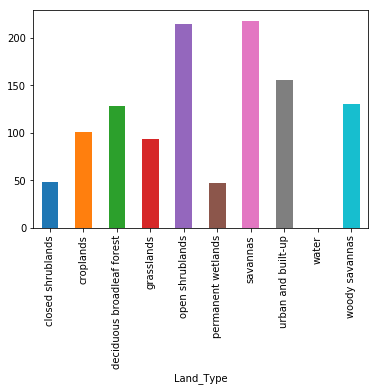

In [13]:
MLanCar.plot(kind='bar')

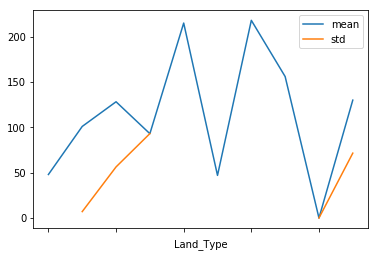

In [14]:
Jrd.plot()

In [36]:
'culo' in LanCar.Land_Type.values

False